In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tqdm.notebook as tq
from utils.premier_utils import *
import matplotlib
import os 
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 8
})

In [2]:
df = pd.read_csv('../data/match_sentiment/6h/match_sentiment.csv')
df

,id,date,time,team,is_big_six,end_season_rank,top_team,bottom_team,opponent,match_between_big_six,...,high_votes_rate,sentiment_score,high_votes_sentiment_score,negative_votes_sentiment_score,positive_sentiment_rate,negative_sentiment_rate,positive_sentiment_votes_mean,positive_sentiment_votes_std,negative_sentiment_votes_mean,negative_sentiment_votes_std
0,1,2020-09-13,2020-09-13T13:00:00,Leicester City,0.0,5.0,1,0,West Bromwich Albion,0,...,0.232044,0.291763,0.488938,NaN,0.718232,0.254144,4.846154,6.290711,2.913043,3.097139
1,2,2020-09-20,2020-09-20T18:00:00,Leicester City,0.0,5.0,1,0,Burnley,0,...,0.099526,0.299581,0.521043,NaN,0.772512,0.222749,3.447853,6.571688,2.106383,2.149156
2,3,2020-09-27,2020-09-27T15:30:00,Leicester City,0.0,5.0,1,0,Manchester City,0,...,0.266520,0.166976,0.303588,0.735450,0.629956,0.343612,5.136364,6.559761,3.871795,4.191724
3,4,2020-10-04,2020-10-04T11:00:00,Leicester City,0.0,5.0,1,0,West Ham United,0,...,0.162319,0.008721,0.034041,-0.056850,0.513043,0.469565,3.666667,4.488200,3.333333,4.462403
4,5,2020-10-18,2020-10-18T18:15:00,Leicester City,0.0,5.0,1,0,Aston Villa,0,...,0.177852,0.099711,0.192487,0.421500,0.567114,0.412752,3.923077,4.730851,3.048780,4.156476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,2021-05-02,2021-05-02T18:15:00,Tottenham Hotspur,1.0,7.0,0,0,Sheffield United,0,...,0.231308,0.160694,0.138764,0.073422,0.619938,0.363707,7.707915,22.177689,8.032120,28.144685
636,35,2021-05-08,2021-05-08T11:30:00,Tottenham Hotspur,1.0,7.0,0,0,Leeds United,0,...,0.147614,0.024604,0.024663,-0.012983,0.517203,0.466426,5.097103,15.651420,5.254610,17.588738
637,36,2021-05-16,2021-05-16T13:05:00,Tottenham Hotspur,1.0,7.0,0,0,Wolverhampton,0,...,0.209942,0.181190,0.223345,0.098404,0.644104,0.338445,7.408046,21.589359,5.817188,17.003710
638,37,2021-05-19,2021-05-19T17:00:00,Tottenham Hotspur,1.0,7.0,0,0,Aston Villa,0,...,0.172136,0.023099,0.023946,0.068652,0.514927,0.466864,6.169819,18.573089,6.360998,19.437982


In [3]:
win_sentiment = (df.loc[df.is_win==1].groupby(['team'])[['end_season_rank','sentiment_score','high_votes_sentiment_score','positive_sentiment_rate','negative_sentiment_rate']].mean()).sort_values(by='end_season_rank')
win_sentiment

,end_season_rank,sentiment_score,high_votes_sentiment_score,positive_sentiment_rate,negative_sentiment_rate
team,,,,,
Manchester City,1.0,0.166606,0.214580,0.629189,0.354945
Manchester United,2.0,0.126324,0.168334,0.594263,0.387683
Liverpool,3.0,0.158625,0.211253,0.622143,0.360822
Chelsea,4.0,0.185084,0.237882,0.638350,0.344852
Leicester City,5.0,0.239340,0.377455,0.695325,0.290823
West Ham United,6.0,0.171664,0.223108,0.630634,0.352038
Tottenham Hotspur,7.0,0.160992,0.179607,0.623802,0.360072
Arsenal,8.0,0.160247,0.205516,0.621723,0.359533
Leeds United,9.0,0.241160,0.293525,0.681730,0.302835


In [4]:
win_sentiment = win_sentiment.reset_index()

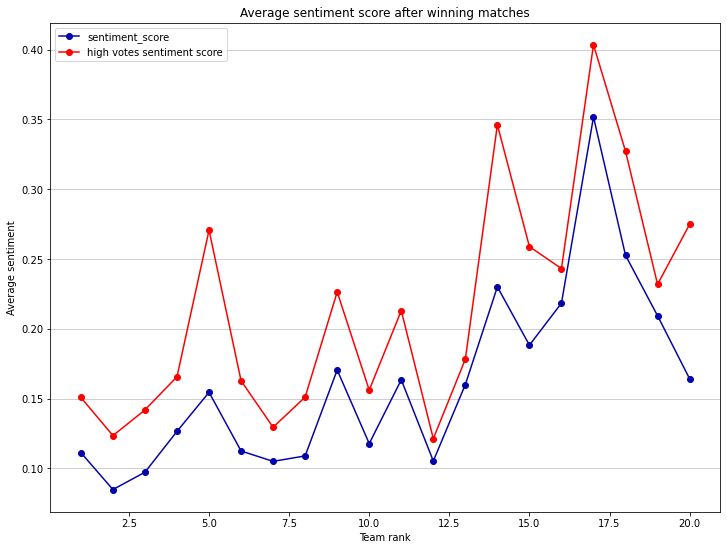

In [5]:
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

plt.grid(axis='y', alpha=0.75)
ax.plot(win_sentiment.end_season_rank,win_sentiment.sentiment_score,color='#0504aa',marker='o',label = 'sentiment_score')
ax.plot(win_sentiment.end_season_rank,win_sentiment.high_votes_sentiment_score,color='r',marker='o',label = 'high votes sentiment score')
#ax2 = ax.twinx()
#ax2.plot(win_sentiment.end_season_rank,win_sentiment.positive_sentiment_rate,color='g',marker='o',label = 'positive sentiment rate')
#ax2.plot(win_sentiment.end_season_rank,win_sentiment.negative_sentiment_rate,color='y',marker='o',label = 'negative sentiment rate')
plt.xlabel('Team rank')
plt.ylabel('Average sentiment')
plt.title('Average sentiment score after winning matches')
plt.legend()
plt.show()

In [5]:
not_win_sentiment = (df.loc[df.is_win==0].groupby(['team'])[['end_season_rank','sentiment_score','high_votes_sentiment_score','positive_sentiment_rate','negative_sentiment_rate']].mean()).sort_values(by='end_season_rank')
not_win_sentiment

,end_season_rank,sentiment_score,high_votes_sentiment_score,positive_sentiment_rate,negative_sentiment_rate
team,,,,,
Manchester City,1.0,0.016628,0.010187,0.358428,0.333066
Manchester United,2.0,0.032592,0.041942,0.372267,0.316688
Liverpool,3.0,0.014649,0.011183,0.343363,0.311987
Chelsea,4.0,0.046490,0.056303,0.371132,0.293275
Leicester City,5.0,0.078131,0.159977,0.393668,0.262324
West Ham United,6.0,0.051632,0.063505,0.397275,0.299998
Tottenham Hotspur,7.0,0.024264,0.033642,0.361694,0.316472
Arsenal,8.0,0.030202,0.030699,0.376840,0.322296
Leeds United,9.0,0.101773,0.153696,0.435665,0.277313


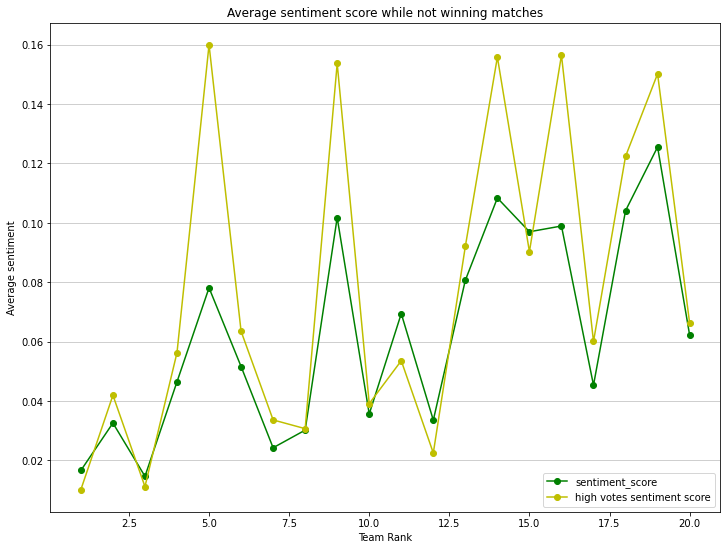

In [7]:
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()

plt.grid(axis='y', alpha=0.75)

ax.plot(not_win_sentiment.end_season_rank,not_win_sentiment.sentiment_score,color='g',marker='o',label = 'sentiment_score')
ax.plot(not_win_sentiment.end_season_rank,not_win_sentiment.high_votes_sentiment_score,color='y',marker='o',label = 'high votes sentiment score')

plt.xlabel('Team Rank')
plt.ylabel('Average sentiment')
plt.title('Average sentiment score while not winning matches')
plt.legend()
plt.show()

In [5]:
lose_sentiment = (df.loc[df.is_loss==1].groupby(['team'])[['end_season_rank','sentiment_score','high_votes_sentiment_score','positive_sentiment_rate','negative_sentiment_rate']].mean()).sort_values(by='end_season_rank')
lose_sentiment

,end_season_rank,sentiment_score,high_votes_sentiment_score,positive_sentiment_rate,negative_sentiment_rate
team,,,,,
Manchester City,1.0,0.017689,0.037196,0.503292,0.477888
Manchester United,2.0,0.003623,-0.002905,0.496567,0.482631
Liverpool,3.0,0.017224,0.009313,0.512794,0.469403
Chelsea,4.0,0.037512,0.043238,0.521955,0.456361
Leicester City,5.0,0.094138,0.148124,0.573170,0.411108
West Ham United,6.0,0.057912,0.035454,0.544992,0.434690
Tottenham Hotspur,7.0,0.023523,0.036197,0.512112,0.467451
Arsenal,8.0,0.031122,0.024634,0.518254,0.460164
Leeds United,9.0,0.112007,0.144887,0.579698,0.403733


In [6]:
lose_sentiment = lose_sentiment.reset_index()

/Users/feegee2000/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


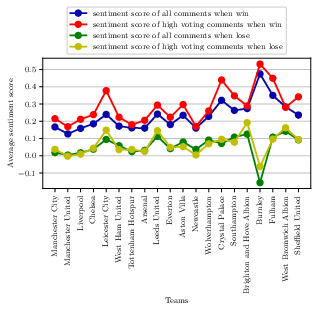

In [15]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(4.8, 2.4)
ax = plt.gca()
ax.grid(axis='y', alpha=0.75)
ax.plot(win_sentiment.team,win_sentiment.sentiment_score,color='#0504aa',marker='o',label = 'sentiment score of all comments when win')
ax.plot(win_sentiment.team,win_sentiment.high_votes_sentiment_score,color='r',marker='o',label = 'sentiment score of high voting comments when win')

ax.plot(lose_sentiment.team,lose_sentiment.sentiment_score,color='g',marker='o',label = 'sentiment score of all comments when lose')
ax.plot(lose_sentiment.team,lose_sentiment.high_votes_sentiment_score,color='y',marker='o',label = 'sentiment score of high voting comments when lose')

ax.set_xlabel(r'Teams')
ax.set_ylabel(r'Average sentiment score')
ax.set_xticklabels(win_sentiment['team'],rotation=90)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))
plt.savefig('../../Final Report/Assets/Sentiment Score.pgf', bbox_inches='tight')

/Users/feegee2000/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


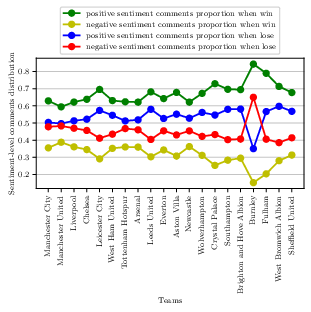

In [16]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(4.8, 2.4)
ax = plt.gca()
ax.grid(axis='y', alpha=0.75)
ax.plot(win_sentiment.team,win_sentiment.positive_sentiment_rate,color='g',marker='o',label = 'positive sentiment comments proportion when win')
ax.plot(win_sentiment.team,win_sentiment.negative_sentiment_rate,color='y',marker='o',label = 'negative sentiment comments proportion when win')
ax.plot(lose_sentiment.team,lose_sentiment.positive_sentiment_rate,color='b',marker='o',label = 'positive sentiment comments proportion when lose')
ax.plot(lose_sentiment.team,lose_sentiment.negative_sentiment_rate,color='r',marker='o',label = 'negative sentiment comments proportion when lose')
ax.set_xlabel(r'Teams')
ax.set_ylabel(r'Sentiment-level comments distribution')
ax.set_xticklabels(win_sentiment['team'],rotation=90)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))
plt.savefig('../../Final Report/Assets/Sentiment Distribution.pgf', bbox_inches='tight')

In [6]:
sentiment = (df.groupby(['team'])[['end_season_rank','sentiment_score','high_votes_sentiment_score','positive_sentiment_rate','negative_sentiment_rate','positive_sentiment_votes_mean','positive_sentiment_votes_std','negative_sentiment_votes_mean','negative_sentiment_votes_std']].mean()).sort_values(by='end_season_rank')
sentiment

,end_season_rank,sentiment_score,high_votes_sentiment_score,positive_sentiment_rate,negative_sentiment_rate,positive_sentiment_votes_mean,positive_sentiment_votes_std,negative_sentiment_votes_mean,negative_sentiment_votes_std
team,,,,,,,,,
Manchester City,1.0,0.092291,0.121743,0.412300,0.265275,8.577549,18.550954,7.382716,15.713632
Manchester United,2.0,0.074836,0.106301,0.400523,0.281503,10.167701,36.337929,8.705296,32.541380
Liverpool,3.0,0.068118,0.090522,0.376280,0.264566,10.072022,31.242039,9.272775,30.803597
Chelsea,4.0,0.095034,0.124309,0.411886,0.261274,7.255299,22.585170,6.309478,21.316872
Leicester City,5.0,0.131269,0.234871,0.432100,0.214480,3.930557,5.555095,3.199250,4.701056
West Ham United,6.0,0.089597,0.124422,0.414438,0.263850,4.784464,8.207821,4.507594,8.035904
Tottenham Hotspur,7.0,0.072575,0.096858,0.400185,0.273261,8.018088,24.524825,6.842651,21.861277
Arsenal,8.0,0.075546,0.097586,0.409034,0.285145,7.610008,27.021825,6.889110,25.999883
Leeds United,9.0,0.143021,0.195194,0.465838,0.246568,5.700812,7.390136,5.069428,6.909644


In [7]:
df_MNC = pd.read_csv('../data/match_sentiment/12h/MNC_match_sentiment.csv')

In [12]:
df_MNC.columns

Index(['id', 'date', 'time', 'team', 'is_big_six', 'end_season_rank',
       'top_team', 'bottom_team', 'opponent', 'match_between_big_six',
       'my_SPI', 'opponent_SPI', 'SPI_difference', 'win_prob', 'my_importance',
       'my_goal', 'opponent_goal', 'is_win', 'is_tie', 'is_loss',
       'top_team_not_win', 'top_team_win', 'bottom_team_win',
       'bottom_team_not_win', 'comments_count', 'comments_votes_mean',
       'comments_votes_std', 'negative_votes_rate', 'high_votes_rate',
       'sentiment_score', 'high_votes_sentiment_score',
       'negative_votes_sentiment_score', 'positive_sentiment_rate',
       'negative_sentiment_rate', 'positive_sentiment_votes_mean',
       'positive_sentiment_votes_std', 'negative_sentiment_votes_mean',
       'negative_sentiment_votes_std'],
      dtype='object')

In [14]:
df_MNC[['date','opponent','my_goal', 'opponent_goal', 'is_win', 'is_tie', 'is_loss','sentiment_score', 'high_votes_sentiment_score',
        'positive_sentiment_rate',
       'negative_sentiment_rate', 'positive_sentiment_votes_mean',
       'positive_sentiment_votes_std', 'negative_sentiment_votes_mean',
       'negative_sentiment_votes_std']]

,date,opponent,my_goal,opponent_goal,is_win,is_tie,is_loss,sentiment_score,high_votes_sentiment_score,positive_sentiment_rate,negative_sentiment_rate,positive_sentiment_votes_mean,positive_sentiment_votes_std,negative_sentiment_votes_mean,negative_sentiment_votes_std
0,2020-09-27,Leicester City,2.0,5.0,0,0,1,0.002186,0.049958,0.361184,0.361619,7.426506,20.514934,6.028881,14.440126
1,2020-10-03,Leeds United,1.0,1.0,0,1,0,0.010896,0.018777,0.360477,0.356846,6.702158,18.427651,8.110465,20.224274
2,2020-10-17,Arsenal,1.0,0.0,1,0,0,0.108472,0.155173,0.429435,0.268145,13.497653,33.781460,9.127820,16.706981
3,2020-10-24,West Ham United,1.0,1.0,0,1,0,0.006242,0.006630,0.341169,0.345198,8.564961,21.529066,8.605058,20.702140
4,2020-10-31,Sheffield United,1.0,0.0,1,0,0,0.084650,0.144286,0.401240,0.271922,8.724062,18.262377,7.114007,16.361621
5,2020-11-08,Liverpool,1.0,1.0,0,1,0,0.028395,0.025103,0.349057,0.309434,6.132432,13.865535,5.516768,10.162783
6,2020-11-21,Tottenham Hotspur,0.0,2.0,0,0,1,0.014654,-0.016468,0.354069,0.339582,5.387485,12.436597,7.286073,20.997271
7,2020-11-28,Burnley,5.0,0.0,1,0,0,0.124135,0.166725,0.423019,0.221973,8.030035,19.694682,6.444444,13.684097
8,2020-12-05,Fulham,2.0,0.0,1,0,0,0.156186,0.136791,0.455767,0.176932,6.194103,12.817751,6.791139,11.452507
9,2020-12-12,Manchester United,0.0,0.0,0,1,0,0.034939,-0.032171,0.395309,0.330664,5.687410,10.208726,7.022491,16.060906
